# Malaria CNN Visualizations

See [main Malaria notebook](./Malaria.ipynb).

## Data

In [1]:
import numpy as np

In [2]:
import load_malaria
labeled_train_meta, _ = load_malaria.load_split_dataset()
paths_train = np.array(labeled_train_meta['path'])

## Model

In [3]:
from keras.models import load_model
cnn_model_best = load_model('logs/cnn-64-augment-20190608-123948/checkpoint-19-0.12.hdf5')

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.


In [4]:
from keras.layers import Conv2D
conv_layers = [i for i, l in enumerate(cnn_model_best.layers) if isinstance(l, Conv2D)]
len(conv_layers)

6

## Filters

In [5]:
import matplotlib.pyplot as plt

In [6]:
def plot_filters(layer, fig=None):
    weights, biases = layer.get_weights()
    _, _, rows, cols = weights.shape
    fig = plt.figure(figsize=(cols / 2, rows / 2))
    grid = plt.GridSpec(rows, cols, wspace=0, hspace=0)
    for i in range(rows):
        for j in range(cols):
            ax = fig.add_subplot(grid[i, j], xticks=[], yticks=[])
            ax.imshow(weights[:, :, i, j] + biases[j])

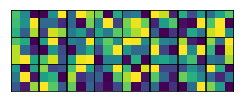

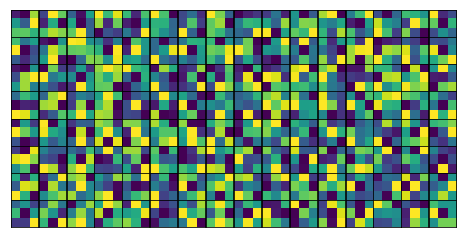

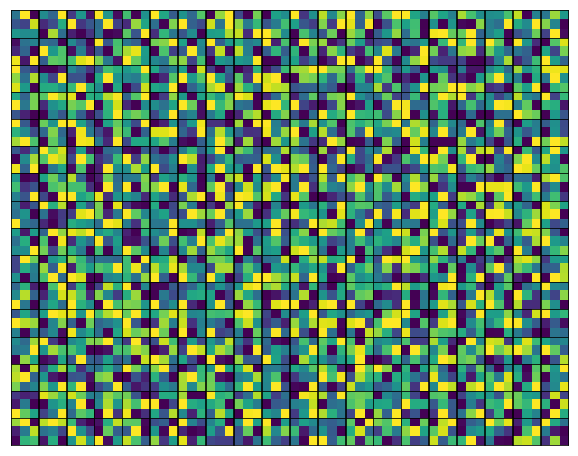

In [7]:
for conv_layer in conv_layers[:3]:
    plot_filters(cnn_model_best.layers[conv_layer])
    plt.show()

## Feature Maps

In [8]:
from malaria_images import make_image_loader, standardize_image
load_image = make_image_loader(64, standardize_image)

In [9]:
from keras.models import Model
def get_intermediate_output(model, layer, data):
    submodel = Model(inputs=model.input, outputs=layer.output)
    output = submodel.predict(np.expand_dims(data, 0))
    return output[0]

In [10]:
import math
def plot_feature_maps(model, layer_index, data, cols=10):
    layer = model.layers[layer_index]
    output = get_intermediate_output(model, layer, data)
    
    n = output.shape[2]
    cols = math.ceil(math.sqrt(n))
    rows = n // cols + 1
    grid = plt.GridSpec(rows, cols)
    
    fig = plt.figure(figsize=(10, 10))
    fig.suptitle(f"Layer {layer_index}: {layer.name} {output.shape}", size=20)
    
    for i in range(n):
        ax = fig.add_subplot(grid[i], xticks=[], yticks=[])
        ax.imshow(output[:,:,i], vmin=output.min(), vmax=output.max())

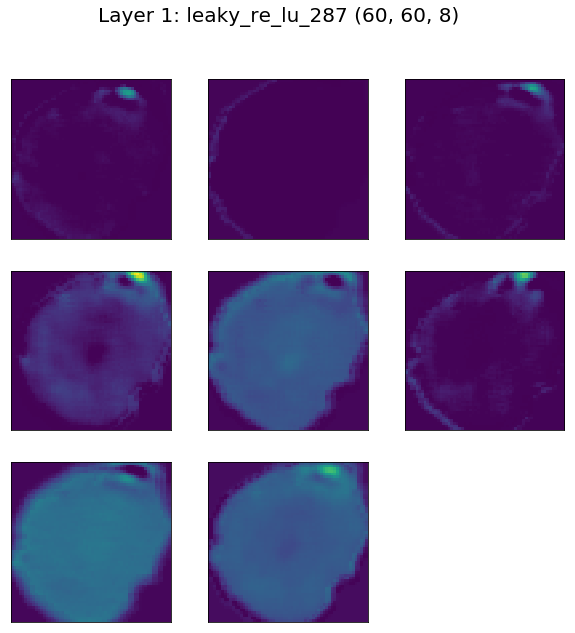

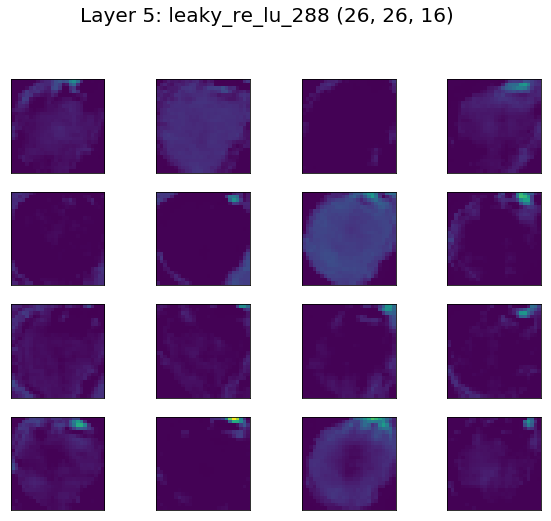

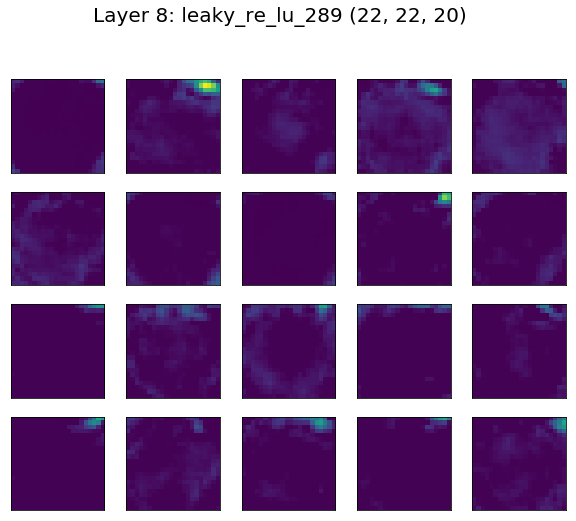

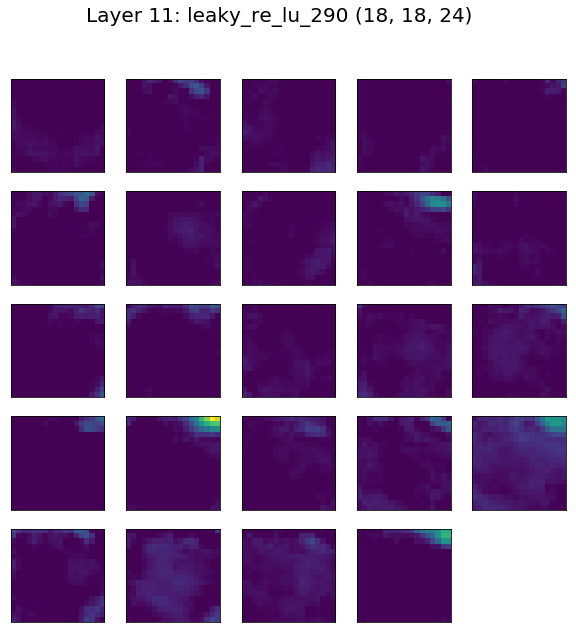

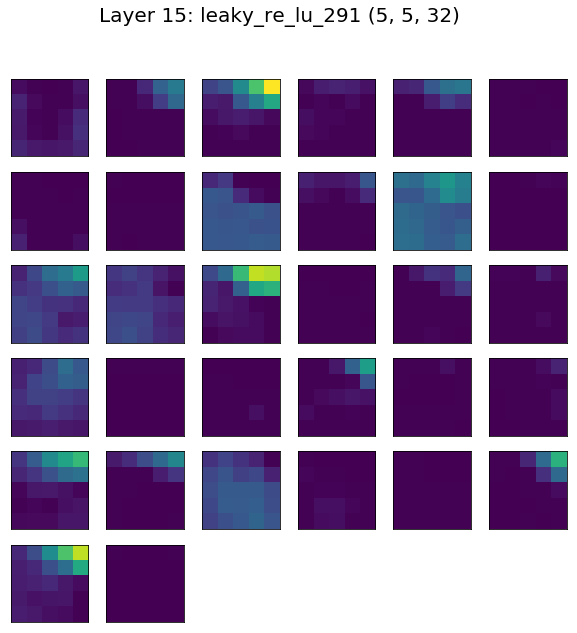

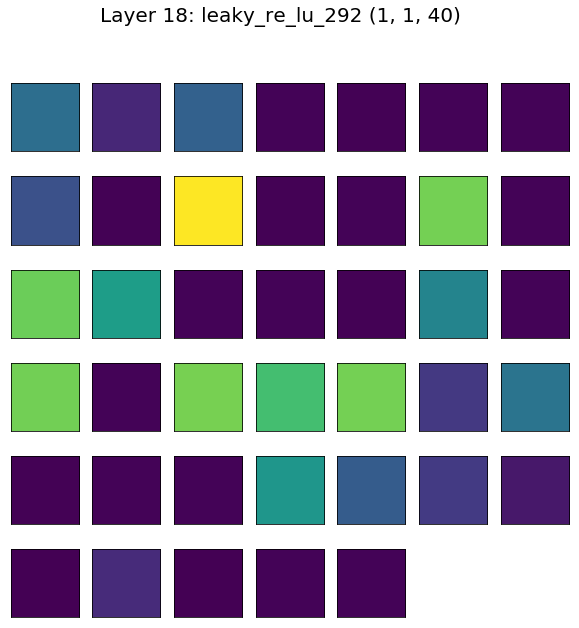

In [11]:
for conv_layer in conv_layers:
    plot_feature_maps(cnn_model_best, conv_layer + 1, load_image(paths_train[260]))
    plt.show()